Problem statement:-
The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset is highly unbalanced, fraud transactions account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.



In [58]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Reading the dataset
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


About dataset

In [7]:
df.shape

(284807, 31)

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Checking for null or missing values

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As there are no null values we don't need  further treatment for null values

In [12]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


There are many duplicate values in the dataset. But we will not remove duplicates as the dataset is highly imbalanced and there are very less no. of fraud values. so we are loosing so much information by removing duplicates.

Data Preprocessing

In [13]:

# checking datatypes
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [16]:
#distrinution for legit and fraundlent transaction
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [56]:
legit_percent = (df['Class'].value_counts()[0] / len(df)) * 100
fraud_percent = (df['Class'].value_counts()[1] / len(df)) * 100
print(legit_percent)
print(fraud_percent)

99.82725143693798
0.1727485630620034


Visivalizing the class distribution of legit and fraud transactions

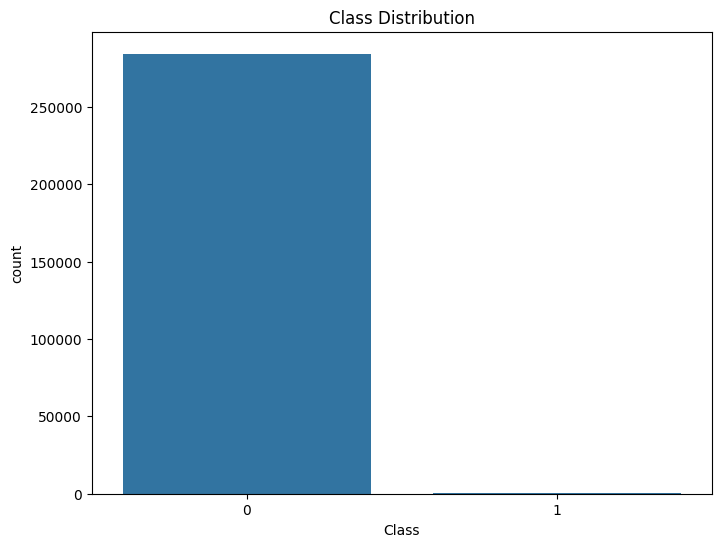

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

From the graph, we can observe that the dataset is highly imbalanced, with a vast majority of transactions being legit (class 0) and a relatively small number of transactions being fraud (class 1). This indicates that the dataset has a class imbalance problem, which may affect the performance of a model trained on this dataset. It may be necessary to use techniques such as oversampling, undersampling, or class weighting to handle the class imbalance problem when building a model for fraud detection.

In [17]:
# Checking for outliers
def check_outliers(df, features):
  for feature in features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_limit = df[feature].quantile(0.25) - 1.5 * IQR
    upper_limit = df[feature].quantile(0.75) + 1.5 * IQR
    outliers = df[~((df[feature] >= lower_limit) & (df[feature] <= upper_limit))]
    print(f"Outliers for {feature}: {outliers.shape[0]}")

features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
check_outliers(df, features)


Outliers for V1: 7062
Outliers for V2: 13526
Outliers for V3: 3363
Outliers for V4: 11148
Outliers for V5: 12295
Outliers for V6: 22965
Outliers for V7: 8948
Outliers for V8: 24134
Outliers for V9: 8283
Outliers for V10: 9496
Outliers for V11: 780
Outliers for V12: 15348
Outliers for V13: 3368
Outliers for V14: 14149
Outliers for V15: 2894
Outliers for V16: 8184
Outliers for V17: 7420
Outliers for V18: 7533
Outliers for V19: 10205
Outliers for V20: 27770
Outliers for V21: 14497
Outliers for V22: 1317
Outliers for V23: 18541
Outliers for V24: 4774
Outliers for V25: 5367
Outliers for V26: 5596
Outliers for V27: 39163
Outliers for V28: 30342


As we can see there are many outliers in the data. So we are not treating the outliers here as the dataset is very imbalanced.

 Understanding patterns and relationships in the data

c:\Users\Sreeroopa Udayagiri\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\Sreeroopa Udayagiri\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


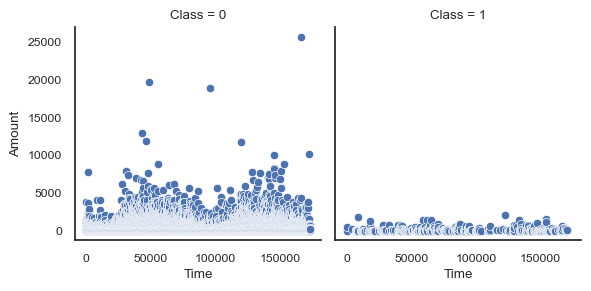

In [19]:
sns.set_style(style='white')
facet_grid = sns.FacetGrid(data=df, col='Class')
facet_grid.map(sns.scatterplot, 'Time', 'Amount', palette='Paired_r')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [20]:
# diffrentiating the fraud and legit data.
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

In [21]:
print(fraud.shape)
print(legit.shape)

(492, 31)
(284315, 31)


In [22]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [23]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

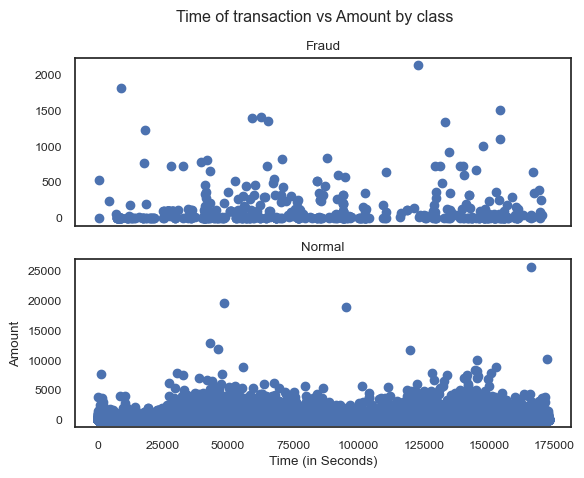

In [24]:
# Lets check the fraudulent transactions occur more often during certain time frame

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [25]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']


In [27]:
from imblearn.over_sampling import SMOTE

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(pd.Series(y_resampled).value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


Machine learning models work better when the data is balanced. As this dataset is imbalanced, SMOTE(addresses class imbalance by creating synthetic samples for the minority class) is used to balance the dataset.

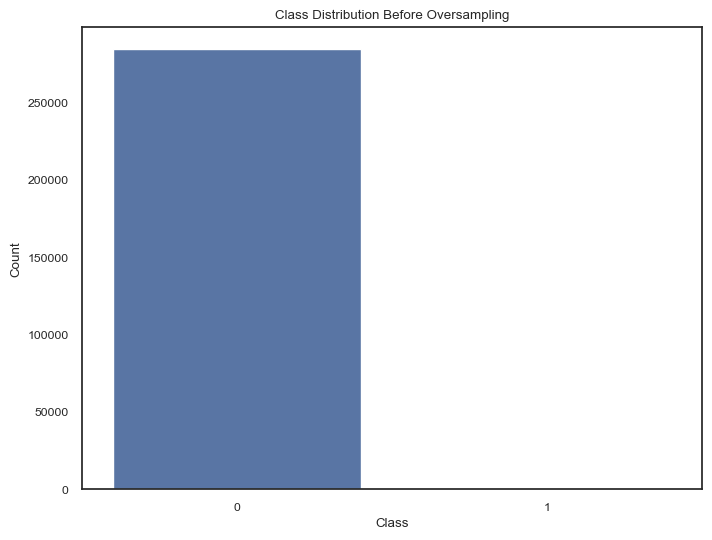

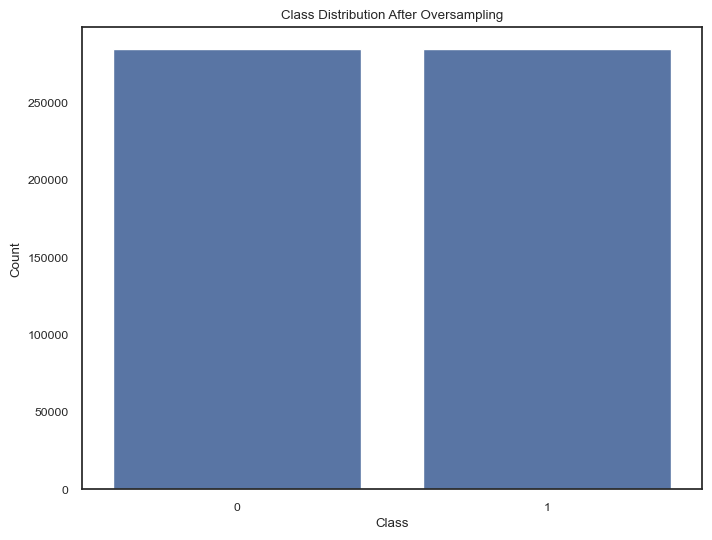

In [28]:

# Plot class distribution before oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution Before Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# Plot class distribution after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

From the above plot, we can clearly observe before and after oversampling

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (398041, 30)
X_test shape: (170589, 30)
y_train shape: (398041,)
y_test shape: (170589,)


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [31]:
# Defining the pipeline for Logistic Regression
LR_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42))
])

In [32]:
# Defining the parameter grid for grid search with Logistic Regression
params_grid = {"logistic__class_weight": [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 50}, 'balanced']}


In [33]:
grid_search = GridSearchCV(LR_pipeline, params_grid, n_jobs=-1, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 5},
                                                    {0: 1, 1: 50},
                                                    'balanced']},
             scoring='f1')

In [34]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'logistic__class_weight': 'balanced'}


In [35]:
LR_best_model = grid_search.best_estimator_
y_pred_LR = LR_best_model.predict(X_test)

Model Evaluation using confusion matrix as it provides a thorough analysis of a model's performance.

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, recall_score,precision_score,f1_score


In [37]:
cm_LR = confusion_matrix(y_test, y_pred_LR)

In [75]:
LR_Acc = accuracy_score(y_test, y_pred_LR)
print("Accuracy:", LR_Acc)

Accuracy: 0.980180433673918


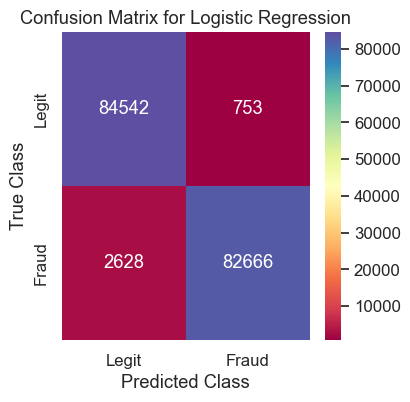

In [38]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_LR, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


In [39]:
print("Classification Report:")
print(classification_report(y_test, y_pred_LR))
print("Accuracy Score:", accuracy_score(y_test, y_pred_LR))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_LR))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85295
           1       0.99      0.97      0.98     85294

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589

Accuracy Score: 0.980180433673918
ROC AUC Score: 0.980180369241591


KNeighborsClassifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
knn_classifier = KNeighborsClassifier(n_neighbors=5) 
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [42]:
y_pred_knn = knn_classifier.predict(X_test_scaled)

In [61]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", knn_accuracy)


Accuracy: 0.9989213841455193


In [44]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

Confusion Matrix:
[[85111   184]
 [    0 85294]]


In [73]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_knn)
print("ROC AUC Score:", roc_auc)
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

ROC AUC Score: 0.9989213904683745
Accuracy Score: 0.9989213841455193


Accuracy is 99%

Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

In [48]:
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [49]:
best_dtree_model = grid_search.best_estimator_

In [50]:
y_pred_dtree = best_dtree_model.predict(X_test)

In [51]:
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

In [76]:
DT_accuracy = accuracy_score(y_test, y_pred_dtree)
print("Accuracy:", DT_accuracy)


Accuracy: 0.9878245373382809


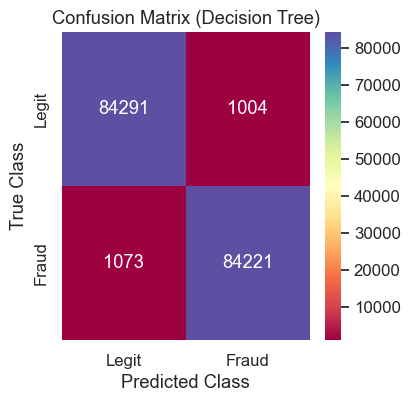

In [52]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_dtree, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix (Decision Tree)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [54]:
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dtree))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dtree))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dtree))

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85295
           1       0.99      0.99      0.99     85294

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

Accuracy Score: 0.9878245373382809
ROC AUC Score: 0.9878245349667779


RandomForestClassifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier()

In [68]:
RF_model = rfc.fit(X_train,y_train)
RF_model_pred = RF_model.predict(X_test)

In [70]:
RF_acc=accuracy_score(y_test,RF_model_pred)
RF_acc

0.9998358628047529

In [74]:
print("Classification Report (RandomForestClassifier):")
print(classification_report(y_test, RF_model_pred))
print("Accuracy Score:", accuracy_score(y_test, RF_model_pred))
print("ROC AUC Score:", roc_auc_score(y_test, RF_model_pred))

Classification Report (RandomForestClassifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Accuracy Score: 0.9998358628047529
ROC AUC Score: 0.9998358636294723


In [80]:
compare = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN'],
                        'Accuracy': [LR_Acc*100, DT_accuracy*100, RF_acc*100, knn_accuracy*100]})
compare.sort_values(by='Accuracy', ascending = False)

,Model,Accuracy
2,Random Forest,99.983586
3,KNN,99.892138
1,Decision Tree,98.782454
0,Logistic Regression,98.018043


In [72]:
import pickle

# Save the trained Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(LR_best_model, file)

# Save the trained KNN model
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_classifier, file)

# Save the trained Decision Tree model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(best_dtree_model, file)

# Save the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)


We have tried several models till now. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

After performing several models such as logistic regression, knn, decision tree, random forest, we have seen that in the balanced dataset with SMOTE technique the  Random Forest  model has good ROC score and also high Recall. Hence, we can go with the Random Forest model here. 